# MSTC RAIN FOREST PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
weather = pd.read_csv("weatherAUS.csv")


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather["MinTemp"].fillna(value=np.mean(weather["MinTemp"]),inplace=True)
weather["MaxTemp"].fillna(value=np.mean(weather["MaxTemp"]),inplace=True)
weather["Humidity9am"].fillna(value=np.mean(weather["Humidity9am"]),inplace=True)
weather["Humidity3pm"].fillna(value=np.mean(weather["Humidity3pm"]),inplace=True)
weather["Temp9am"].fillna(value=np.mean(weather["Temp9am"]),inplace=True)
weather["Temp3pm"].fillna(value=np.mean(weather["Temp3pm"]),inplace=True)
weather["WindSpeed9am"].fillna(value=np.mean(weather["WindSpeed9am"]),inplace=True)
weather["WindSpeed3pm"].fillna(value=np.mean(weather["WindSpeed3pm"]),inplace=True)
weather["Pressure9am"].fillna(value=np.mean(weather["Pressure9am"]),inplace=True)
weather["Pressure3pm"].fillna(value=np.mean(weather["Pressure3pm"]),inplace=True)
weather["Rainfall"].fillna(value=np.mean(weather["Rainfall"]),inplace=True)
weather["WindGustSpeed"].fillna(value=np.mean(weather["WindGustSpeed"]),inplace=True)
weather["Evaporation"].fillna(value=np.mean(weather["Evaporation"]),inplace=True)
weather.drop("Sunshine",axis=1,inplace=True)
weather.drop(["Cloud9am","Cloud3pm"],axis=1,inplace=True)
weather.drop(["WindDir3pm","WindDir9am"],axis=1,inplace=True)
weather.drop("WindGustDir",axis=1,inplace=True)

In [6]:


weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [7]:
rt=pd.get_dummies(['RainTomorrow'])
weather['RainTomorrow']

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

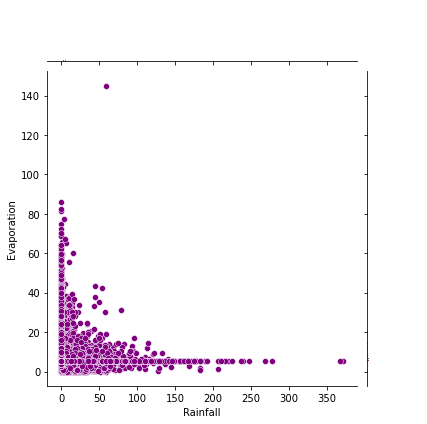

In [8]:
sns.jointplot(x='Rainfall',y='Evaporation',data=weather,color='purple')

In [9]:
num_cols = weather.select_dtypes('number').columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

<AxesSubplot:>

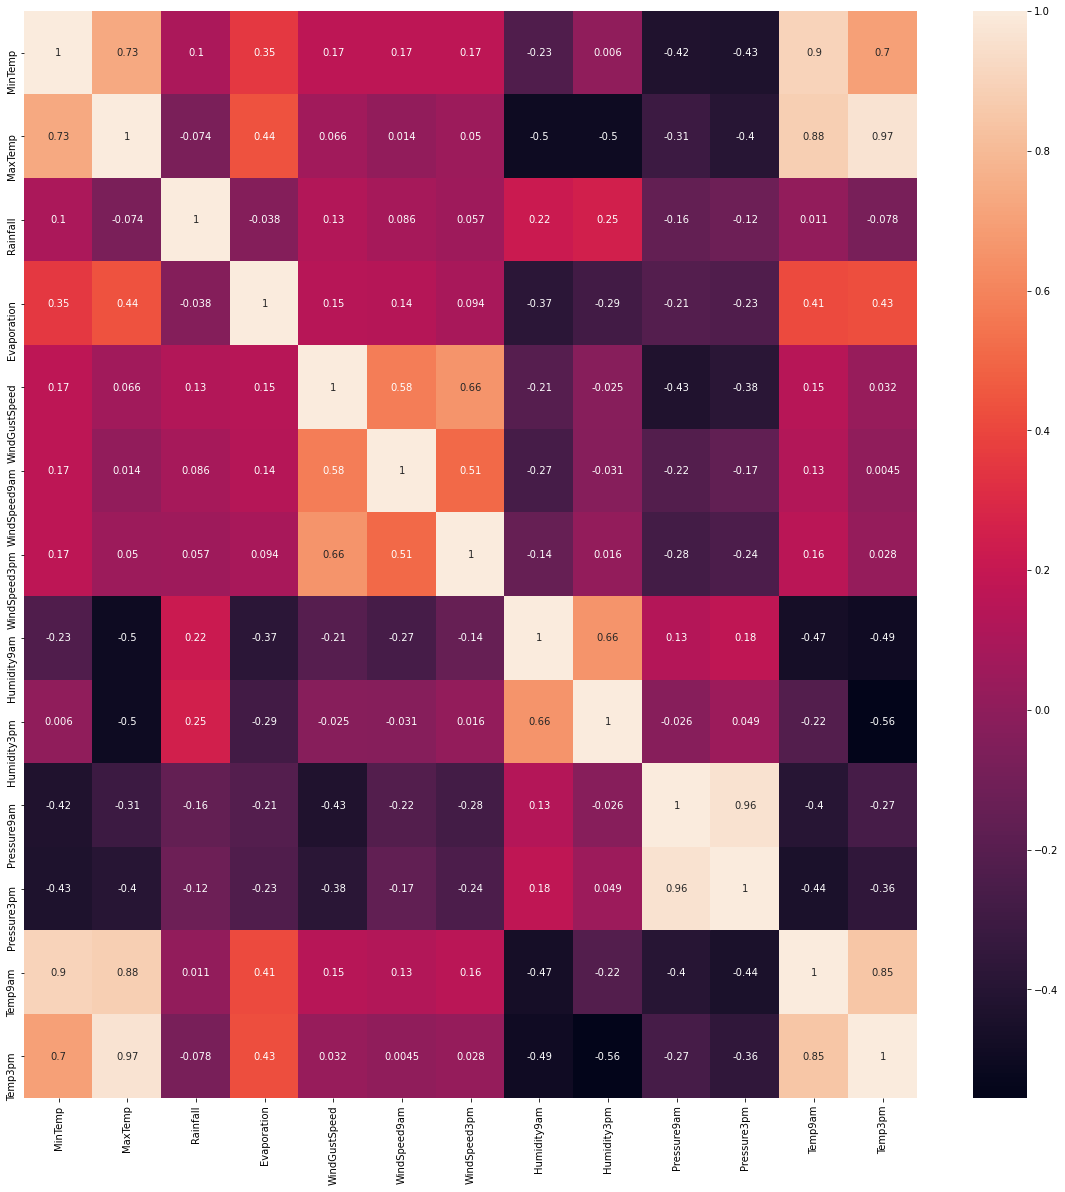

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(weather[num_cols].corr(), annot=True)

In [11]:
def converter(x):
    if(x=="Yes"):
        return 1
    else:
        return 0

In [12]:
weather["RTod"]=weather["RainToday"].apply(converter)
weather["RTom"]=weather["RainTomorrow"].apply(converter)
weather["RainTomorrow"].value_counts()
weather["RainTomorrow"].isna().value_counts()
weather["RainTomorrow"].dropna(inplace=True)

<AxesSubplot:>

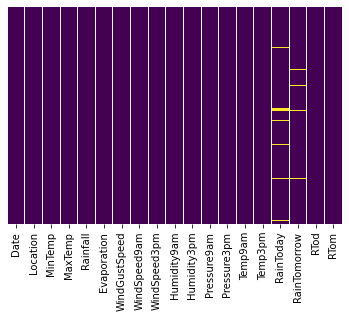

In [13]:
sns.heatmap(weather.isnull(),yticklabels=False,cbar=False,cmap="viridis")



In [14]:
data=weather.drop(["Date","Location","RainToday","RainTomorrow"],axis=1)
from sklearn.model_selection import train_test_split


In [15]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RTod,RTom
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,0,0


In [16]:
data=weather.drop(["Date","Location","RainToday","RainTomorrow"],axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RTod,RTom
0,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [17]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RTod,RTom
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,0,0


In [18]:
X=data.drop("RTom",axis=1)
Y=data["RTom"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [20]:
RFC_pred=RFC.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(Y_test,RFC_pred))
print("\n")
print(classification_report(Y_test,RFC_pred))

[[35781  1586]
 [ 5589  5046]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37367
           1       0.76      0.47      0.58     10635

    accuracy                           0.85     48002
   macro avg       0.81      0.72      0.75     48002
weighted avg       0.84      0.85      0.84     48002



In [23]:
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=34')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=34


[[35924  1443]
 [ 6052  4583]]


              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37367
           1       0.76      0.43      0.55     10635

    accuracy                           0.84     48002
   macro avg       0.81      0.70      0.73     48002
weighted avg       0.83      0.84      0.83     48002



In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test,rfc_pred))
print(classification_report(Y_test,rfc_pred))

[[35752  1615]
 [ 5605  5030]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37367
           1       0.76      0.47      0.58     10635

    accuracy                           0.85     48002
   macro avg       0.81      0.71      0.75     48002
weighted avg       0.84      0.85      0.84     48002



In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,Y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10], 'gamma': [0.1,0.01]}
grid=GridSearchCV(SVC(),param_grid,verbose=2,refit=2)
grid.fit(X_train,Y_train)

In [ ]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(Y_test,grid_predictions))
print(classification_report(Y_test,grid_predictions))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('RainTomorrow',axis=1))

In [ ]:
kmeans.cluster_centers_

In [ ]:
def converter(cluster):
    if cluster==0:
        return 0
    else:
        return 1


In [ ]:
weather['Cluster'] = weather['RainTomorrow'].apply(converter)
weather.head()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(weather['Cluster'],kmeans.labels_))
print(classification_report(weather['Cluster'],kmeans.labels_))